<a href="https://colab.research.google.com/github/jbloewencolon/Creating-Dataset-for-The-Demographics-of-Faerun/blob/main/data_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade matplotlib

import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from matplotlib.ticker import ScalarFormatter, FuncFormatter, MultipleLocator

# File path
df_file_path = '/content/drive/MyDrive/Colab Notebooks/DnD/fictional_data.xlsx'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [2]:
# Read the Excel file into a DataFrame
df = pd.read_excel(df_file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   settlement                  648 non-null    object 
 1   region_kingdom              648 non-null    object 
 2   capital                     648 non-null    object 
 3   settlement_population       648 non-null    int64  
 4   settlement_economy          648 non-null    int64  
 5   rumored_treasure_value      648 non-null    int64  
 6   demographic_breakdown       648 non-null    object 
 7   average_age                 648 non-null    int64  
 8   most_likely_cause_of_death  648 non-null    object 
 9   government_type             648 non-null    object 
 10  class_density               648 non-null    object 
 11  tax_rate                    648 non-null    int64  
 12  exports                     647 non-null    object 
 13  imports                     623 non

In [3]:
# Dropping specified columns
df = df.drop(columns=['ruler', 'sources', 'area', 'capital'])

# Converting 'magic_academy' and 'military' to binary values
df['magic_academy'] = df['magic_academy'].apply(lambda x: 0 if x == 'None' else 1)
df['military'] = df['military'].apply(lambda x: 0 if x == 'None' else 1)

In [4]:
# List of numerical features
num_features = ['settlement_population', 'settlement_economy', 'rumored_treasure_value', 'average_age', 'tax_rate', 'region_population', 'region_economy', 'average_temperature', 'annual_rainfall', 'magical_climate', 'dragon_sightings']

# List of categorical features
cat_features = ['demographic_breakdown','class_density','magic_academy', 'military']

In [5]:
df.head()

,settlement,region_kingdom,settlement_population,settlement_economy,rumored_treasure_value,demographic_breakdown,average_age,most_likely_cause_of_death,government_type,class_density,...,military,magic_academy,languages,religions,region_population,region_economy,average_temperature,annual_rainfall,magical_climate,dragon_sightings
0,Athkatla,Amn,116163,34272222,526941,"{'humans': 116046, 'halflings': 116, 'half-orc...",39,Work-related accidents,['Confederacy'],"{'Aristocratic': 332, 'Wealthy': 2809, 'Comfor...",...,1,1,"['Chondathan', 'Common']","['Bane', 'Chauntea', 'Cyric', 'Selûne', 'Sune'...",2920094,403450,58.0,36.6,68,1
1,Amnwater,Amn,7035,1092226,1122,"{'humans': 2335, 'halflings': 4699, 'half-orcs...",55,Bandit attacks,['Matriarchy'],"{'Aristocratic': 2, 'Wealthy': 113, 'Comfortab...",...,1,0,"['Chondathan', 'Common']","['Bane', 'Chauntea', 'Cyric', 'Selûne', 'Sune'...",2920094,403450,67.6,38.2,82,0
2,Citadel Amnur,Amn,636,81796,81,"{'humans': 580, 'halflings': 55, 'half-orcs': ...",43,Assassination,['Patriarchy'],"{'Aristocratic': 0, 'Wealthy': 1, 'Comfortable...",...,1,0,"['Chondathan', 'Common']","['Bane', 'Chauntea', 'Cyric', 'Selûne', 'Sune'...",2920094,403450,69.1,44.6,56,0
3,Citadel Rashturl,Amn,710,102127,102,"{'humans': 487, 'halflings': 222, 'half-orcs':...",49,Poison,['Monarchy'],"{'Aristocratic': 0, 'Wealthy': 3, 'Comfortable...",...,1,0,"['Chondathan', 'Common']","['Bane', 'Chauntea', 'Cyric', 'Selûne', 'Sune'...",2920094,403450,52.5,49.4,76,0
4,Coryllvol,Amn,23000,4192755,9199,"{'humans': 5842, 'halflings': 17158, 'half-orc...",58,Starvation,['Kleptocracy'],"{'Aristocratic': 71, 'Wealthy': 631, 'Comforta...",...,1,1,"['Chondathan', 'Common']","['Bane', 'Chauntea', 'Cyric', 'Selûne', 'Sune'...",2920094,403450,57.1,43.3,56,1


In [ ]:
# Convert string representation of dictionaries to dictionaries
df['demographic_breakdown'] = df['demographic_breakdown'].apply(ast.literal_eval)
df['class_density'] = df['class_density'].apply(ast.literal_eval)

# One-hot encode the dictionaries in 'demographic_breakdown' and 'class_density'
df = pd.concat([df, df['demographic_breakdown'].apply(pd.Series).add_prefix('demo_')], axis=1)
df = pd.concat([df, df['class_density'].apply(pd.Series).add_prefix('class_')], axis=1)

# Drop the original columns
df = df.drop(columns=['demographic_breakdown', 'class_density'])


<ipython-input-18-c12185fcaf73>:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = pd.concat([df, df['demographic_breakdown'].apply(pd.Series).add_prefix('demo_')], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   settlement                           648 non-null    object 
 1   region_kingdom                       648 non-null    object 
 2   settlement_population                648 non-null    int64  
 3   settlement_economy                   648 non-null    int64  
 4   rumored_treasure_value               648 non-null    int64  
 5   average_age                          648 non-null    int64  
 6   most_likely_cause_of_death           648 non-null    object 
 7   government_type                      648 non-null    object 
 8   tax_rate                             648 non-null    int64  
 9   exports                              647 non-null    object 
 10  imports                              623 non-null    object 
 11  military                        

In [ ]:
columns_to_drop = [
    'demo_tieflings',
    'demo_dragonborn',
    'demo_eladrin',
    'demo_firbolg',
    'demo_vengeance-obsessed cat (Silky)',
    'demo_sentient wombats',
    'demo_platypuses',
    'demo_yuan-ti',
    'demo_merfolk'
]

df.drop(columns=columns_to_drop, inplace=True)


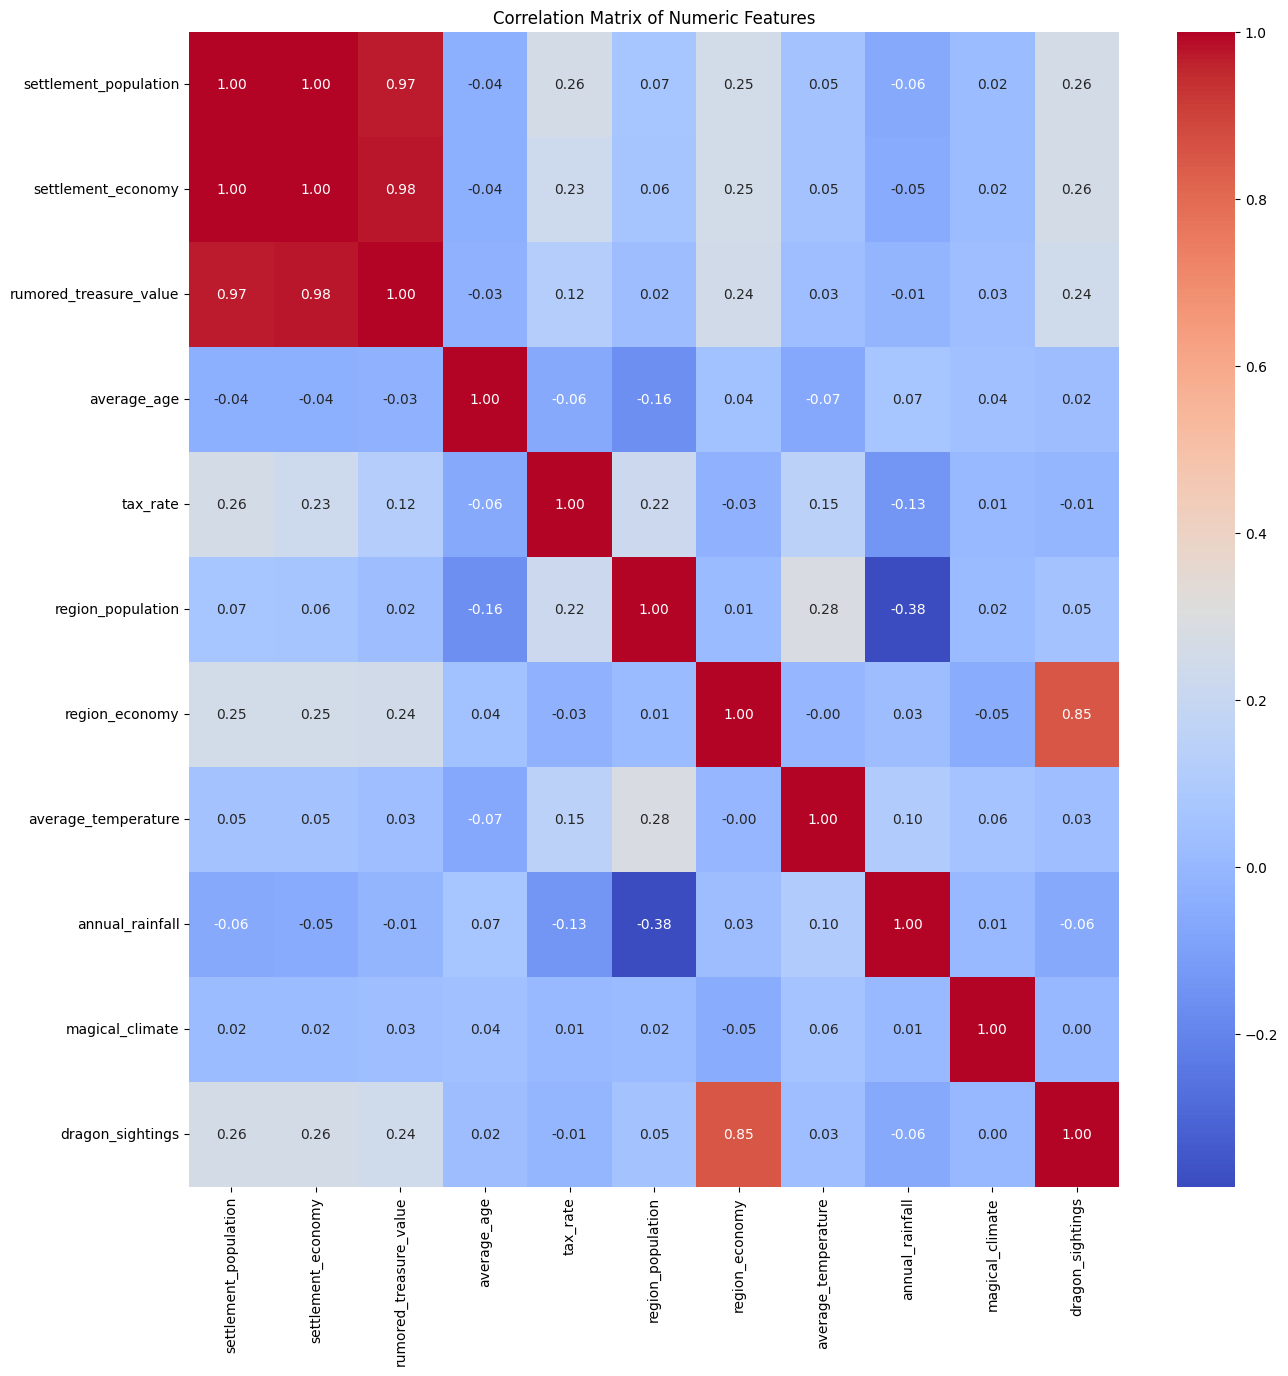

In [ ]:
# Compute and Visualize Correlation Matrix for numeric columns
correlation_matrix = df[num_features].corr()
plt.figure(figsize=(15, 15))  # Optional: Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

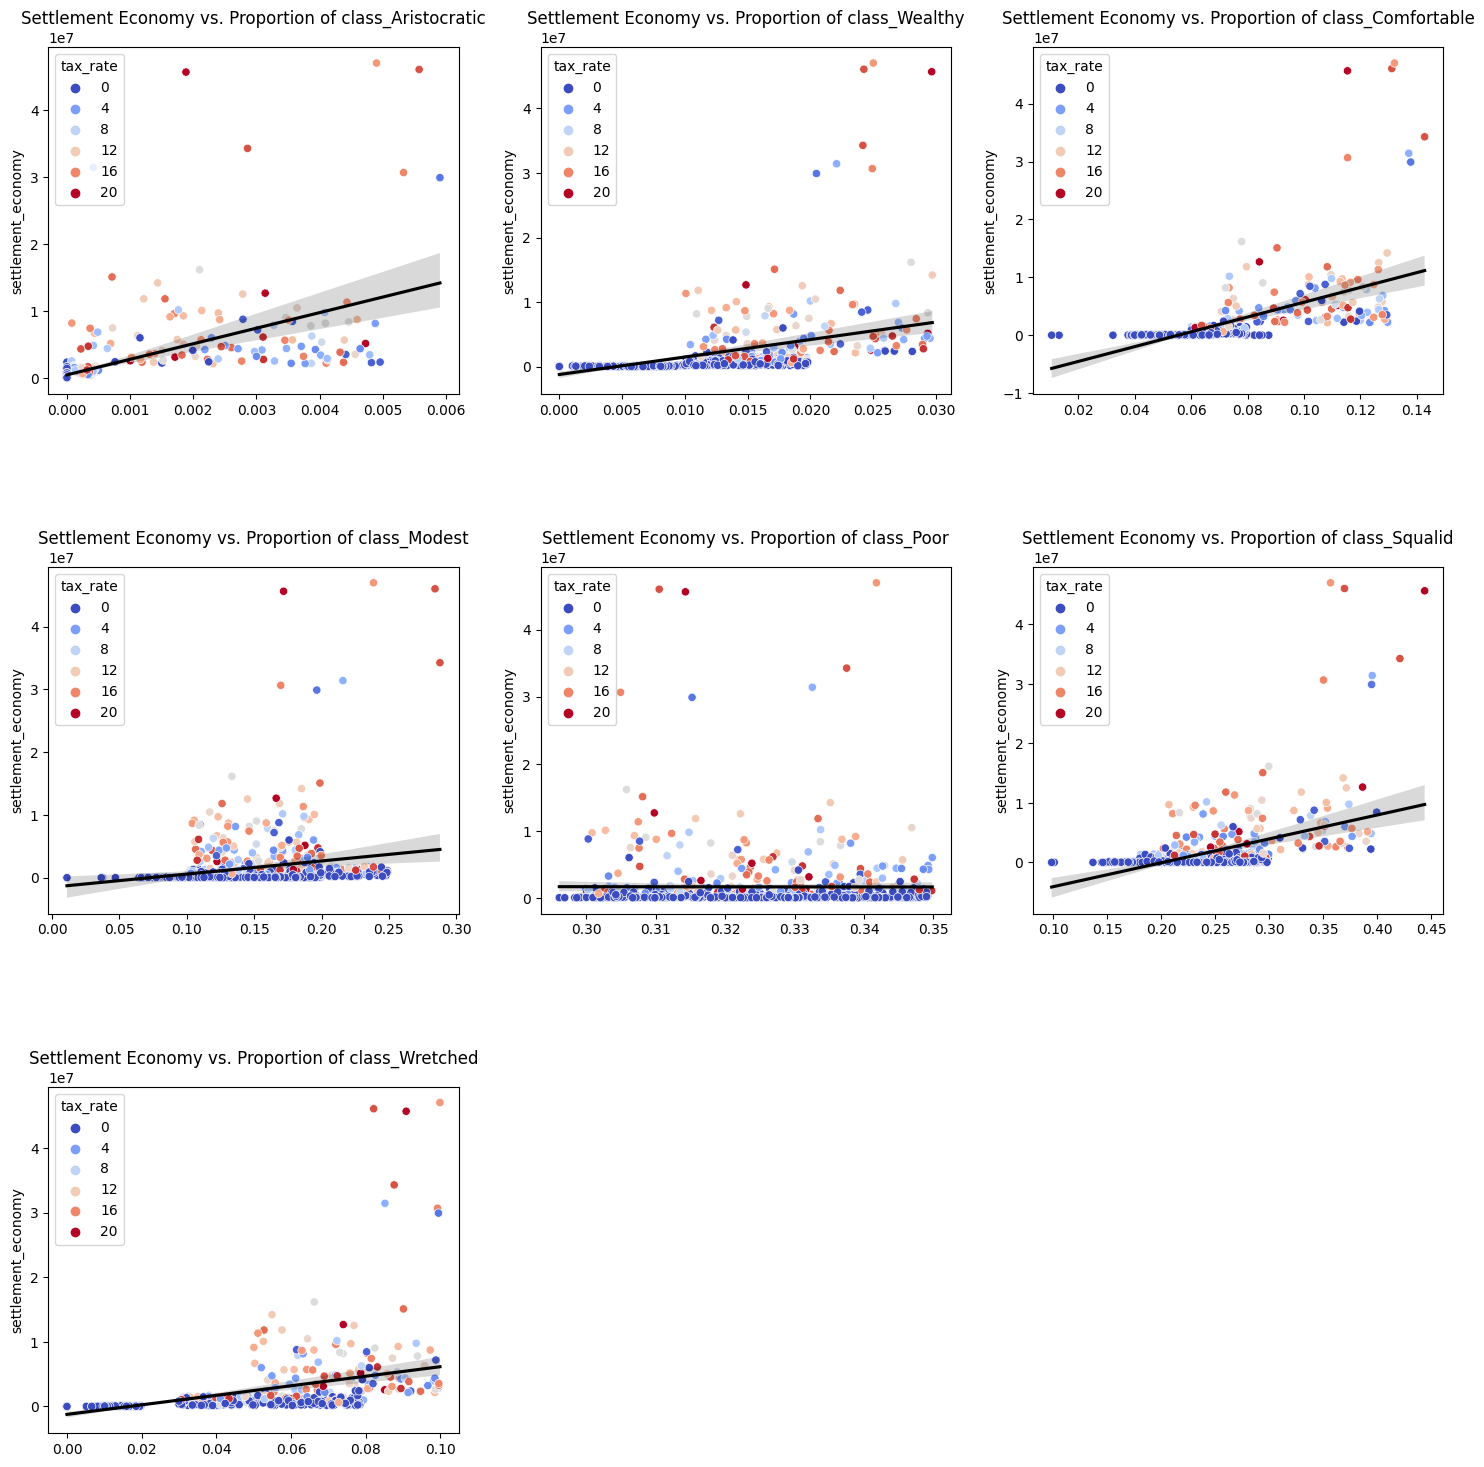

In [ ]:
# List of class types
class_types = ['class_Aristocratic', 'class_Wealthy', 'class_Comfortable', 'class_Modest', 'class_Poor', 'class_Squalid', 'class_Wretched']

# Create subplots with a grid layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5)

# Iterate through class types and create scatter plots
for i, class_type in enumerate(class_types):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Filter the DataFrame to exclude 'Waterdeep'
    filtered_df = df[df['settlement'] != 'Waterdeep']

    # Calculate the proportion of the current class type to total population
    p_class_type = filtered_df[class_type] / filtered_df['settlement_population']

    # Create a scatter plot for the current class type
    scatter = sns.scatterplot(data=filtered_df, x=p_class_type, y='settlement_economy', hue='tax_rate', ax=ax, palette='coolwarm')
    ax.set_xlabel(f'Proportion of {class_type} to Total Population')
    ax.set_ylabel('Settlement Economy')
    ax.set_title(f'Settlement Economy vs. Proportion of {class_type}')

    # Add a linear regression line
    sns.regplot(data=filtered_df, x=p_class_type, y='settlement_economy', scatter=False, ax=ax, color='black')

# Remove empty subplots
if len(class_types) < 9:
    for i in range(len(class_types), 9):
        fig.delaxes(axes.flatten()[i])

plt.show()

In [52]:
# Step 2: Feature Selection
features = ['settlement_population', 'dragon_sightings', 'rumored_treasure_value', 'region_population', 'magical_climate', 'class_Aristocratic', 'class_Wealthy', 'class_Comfortable', 'class_Modest', 'class_Poor', 'class_Squalid', 'class_Wretched']
X = df[features]
y = df['settlement_economy']

# Step 3: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Poisson Regression
X_train = sm.add_constant(X_train)  # Add a constant term (intercept) to the model
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson())  # Create the Poisson regression model
result = poisson_model.fit()  # Fit the model
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:     settlement_economy   No. Observations:                  518
Model:                            GLM   Df Residuals:                      505
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.9058e+08
Date:                Fri, 06 Oct 2023   Deviance:                   3.8116e+08
Time:                        18:30:20   Pearson chi2:                 3.69e+08
No. Iterations:                    12   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     12

In [ ]:
# Step 5: Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print(classification_report(y_test, rf_preds))

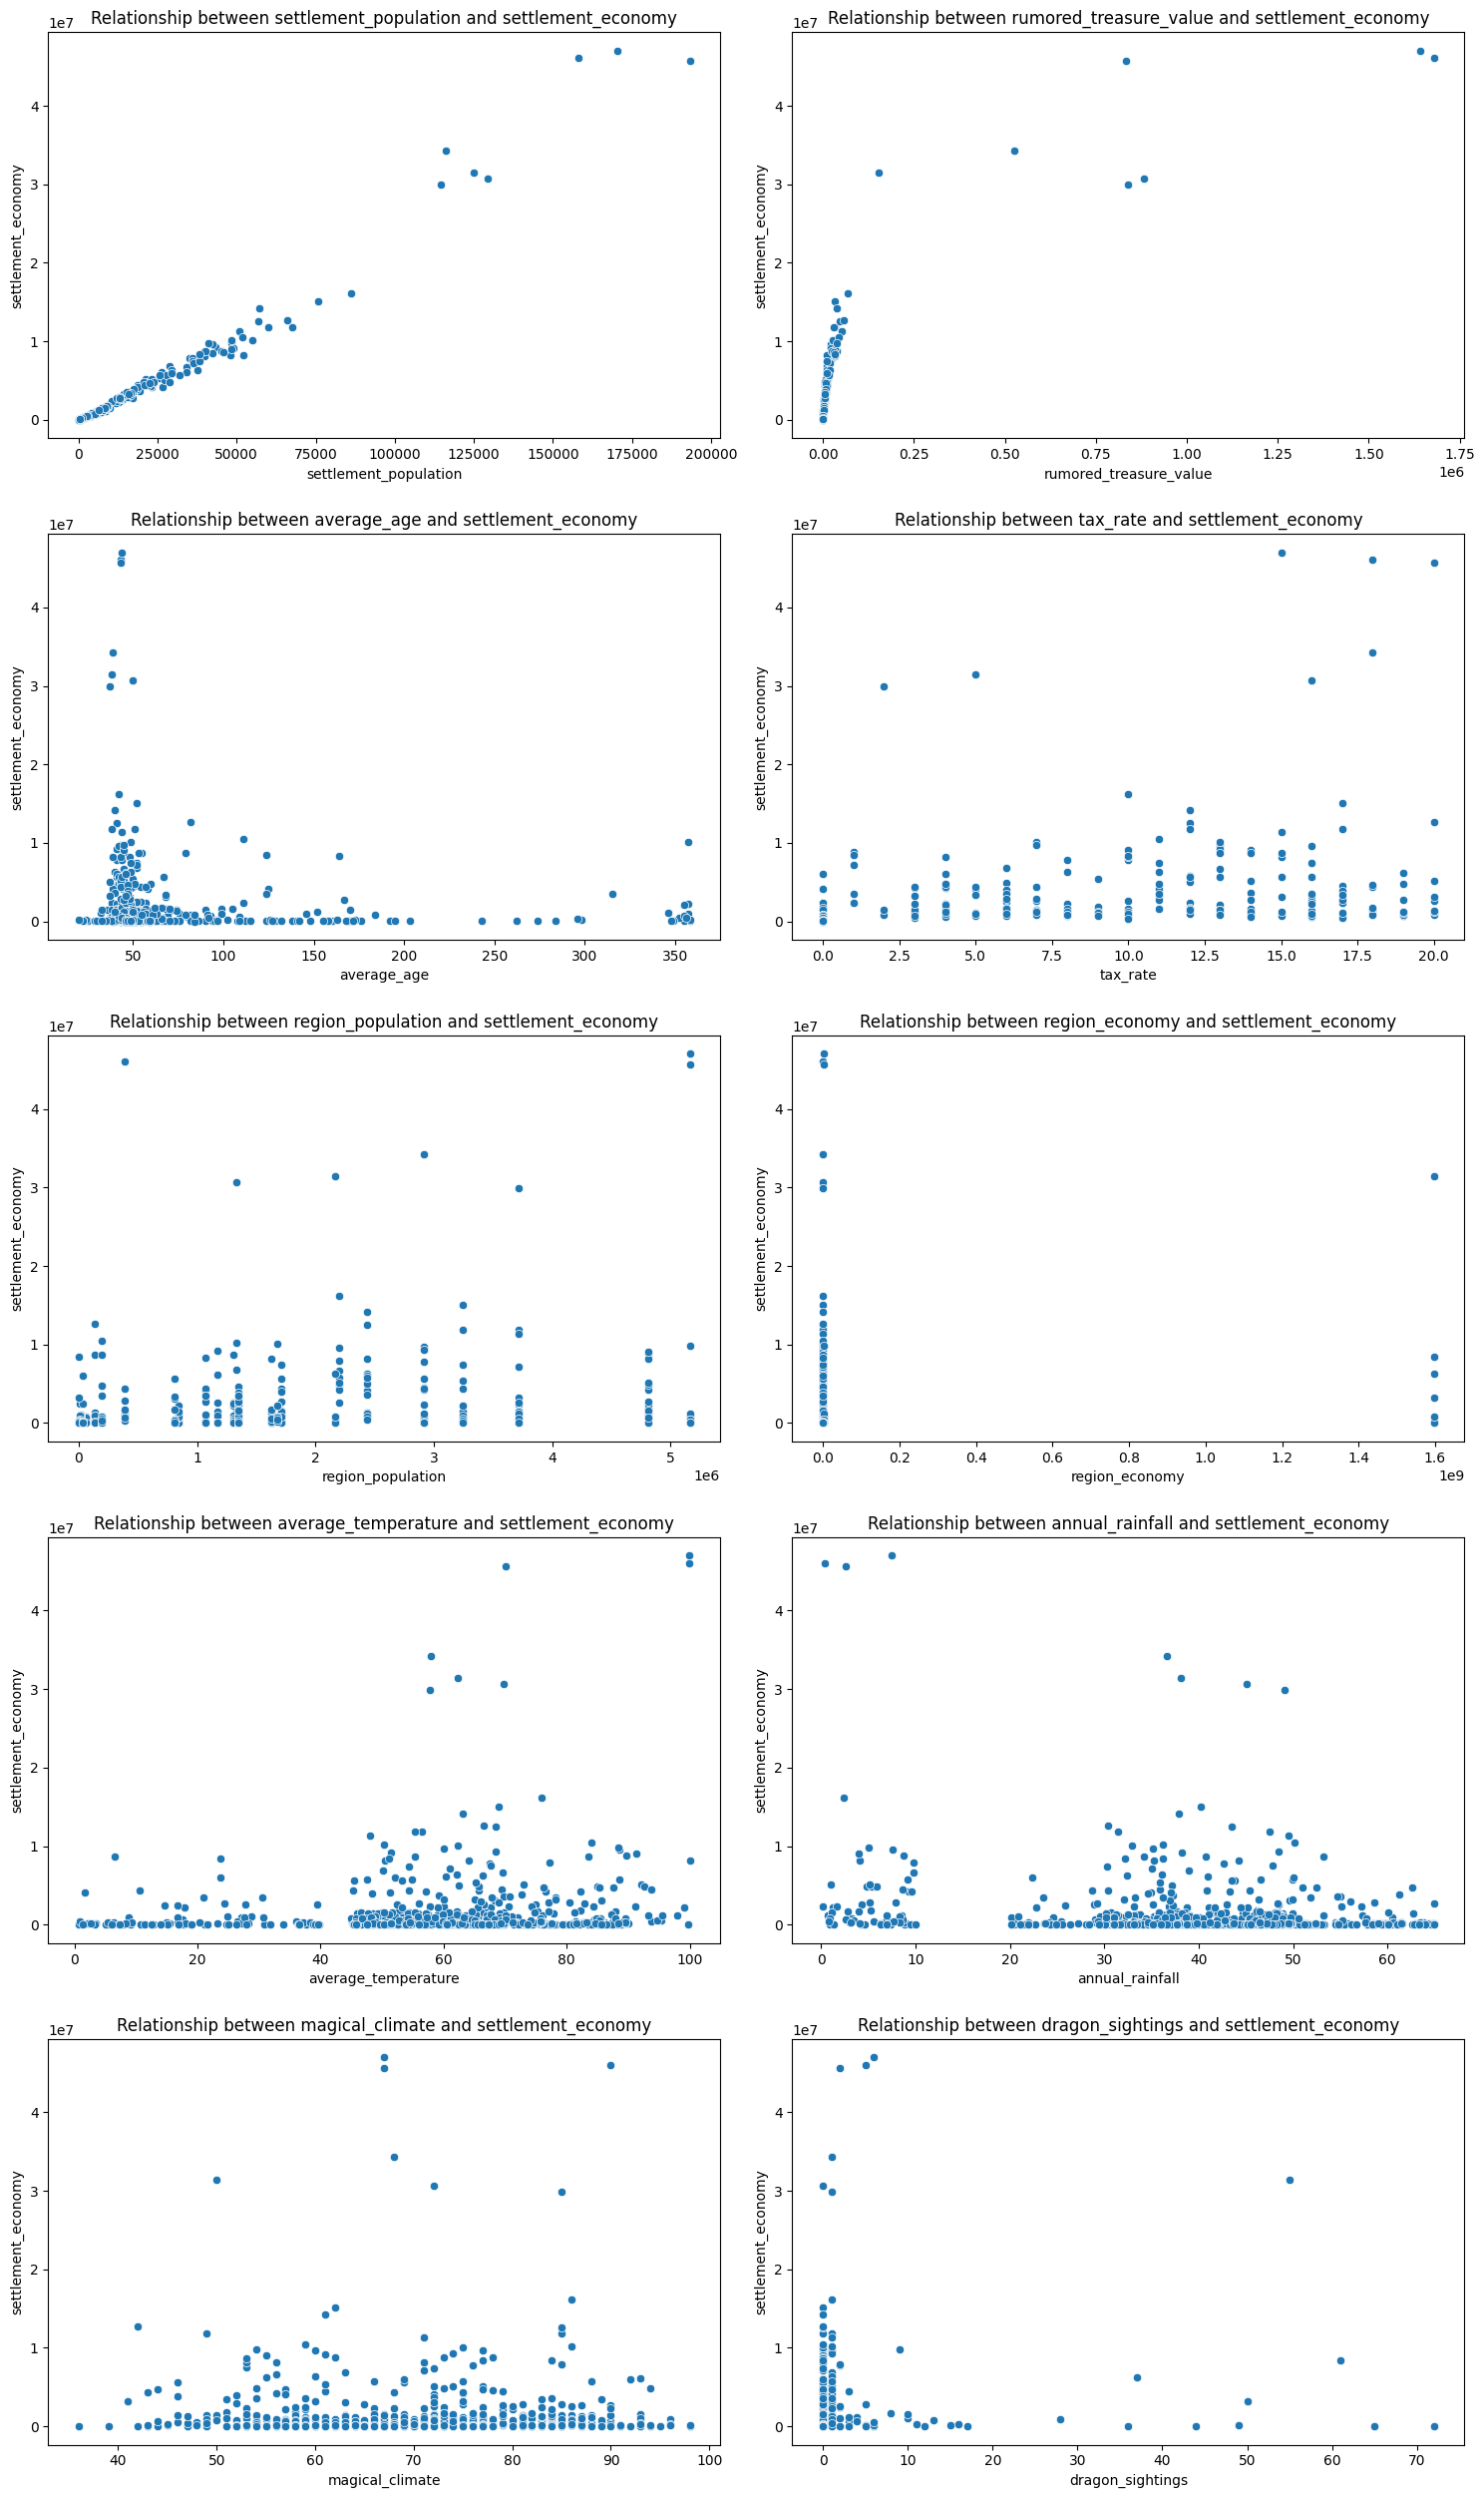

In [9]:
# Filter out outliers above the 99th percentile
filtered_df = df[df[num_features].apply(lambda x: np.abs(x - x.mean()) / x.std() < 10).all(axis=1)]

# Define n_rows
num_features = [feature for feature in num_features if feature != 'settlement_economy']
n_rows = len(num_features)

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * n_rows))

# Iterate over features and add subplots
for i, feature in enumerate(num_features, 1):
    plt.subplot(n_rows, 2, i)

    # Scatter plot for the relation between feature and settlement_economy
    sns.scatterplot(data=filtered_df, x=feature, y='settlement_economy')

    plt.title(f'Relationship between {feature} and settlement_economy')
    plt.xlabel(feature)
    plt.ylabel('settlement_economy')

plt.tight_layout()
plt.show()